<a href="https://colab.research.google.com/github/akpanitorobong/7089CEM---Statistical-methods-for-Data-Science/blob/main/SMDS_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0: Setup and Preparation**

In [153]:
# Load Required Libraries
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
if (!requireNamespace("tidyverse", quietly = TRUE)) install.packages("tidyverse")
if (!requireNamespace("gridExtra", quietly = TRUE)) install.packages("gridExtra")

library(ggplot2)
library(tidyverse)
library(dplyr)
library(gridExtra)
# Ensure Data Directory Exists
if (!dir.exists("data")) dir.create("data")

# Download ZIP File from GitHub
zip_url <- "https://github.com/akpanitorobong/7089CEM---Statistical-methods-for-Data-Science/raw/main/data/data.zip"

zip_path <- "data.zip"

download.file(zip_url, destfile = zip_path, mode="wb" )

# Unzip Contents
unzip(zip_path)
print("Unzipped data files")

[1] "Unzipped data files"


In [154]:
X <- read.csv("data/X.csv")
y <- read.csv("data/y.csv")
time <- read.csv("data/time.csv")

In [155]:
# Convert matrices to data frames
X_df <- as.data.frame(X)
y_df <- as.data.frame(y)
time_vec <- as.vector(time)

# Assign column names
colnames(y_df) <- "y"
colnames(X_df) <- paste0("x", 1:ncol(X_df))

# Merge into one data frame
data <- cbind(time = time_vec, X_df, y = y_df$y)

print("Data processed and merged")

[1] "Data processed and merged"


In [156]:
colnames(data)

[1] "time" "x1"   "x2"   "y"

In [157]:
print(data)

    time           x1 x2         y
1    0.1 -1.383422832  0 10.677616
2    0.2  0.491178373  0 18.885513
3    0.3 -0.528827149  0 11.246081
4    0.4 -0.359454829  0  9.364583
5    0.5  0.173339974  0 13.434298
6    0.6  1.220736979  0 26.166061
7    0.7 -1.581946320  0 13.988762
8    0.8 -1.650701829  0 10.786357
9    0.9  1.159037442  0 26.813133
10   1.0  0.187132383  0 10.595761
11   1.1 -0.777186479  0  7.817391
12   1.2  0.931395196  0 23.035803
13   1.3 -1.322098702  0  6.288489
14   1.4  1.473596778  0 35.636632
15   1.5  1.522166635  0 33.297743
16   1.6  0.360967569  0 10.862793
17   1.7 -1.610802290  0 12.441149
18   1.8  0.287134750  0 14.057977
19   1.9 -0.419471270  0  3.541303
20   2.0  0.583635139  0 19.463500
21   2.1  0.985311720  0 21.104694
22   2.2  0.957255855  0 16.472181
23   2.3  0.979628042  0 23.638102
24   2.4 -0.881317862  0 10.251319
25   2.5 -0.127583649  0  6.173816
26   2.6 -0.316225842  0  6.557701
27   2.7 -2.138663031  0 16.383302
28   2.8  0.07823511

# **Task 1: Exploratory Data Analysis**

In [158]:
# Use filter from dplyr
data_x0 <- data %>% filter(x2 == 0)
data_x1 <- data %>% filter(x2 == 1)
print("data split")

[1] "data split"


**Task 1.1: Time Series Plots of Input Audio and Output MEG Signal**

Input

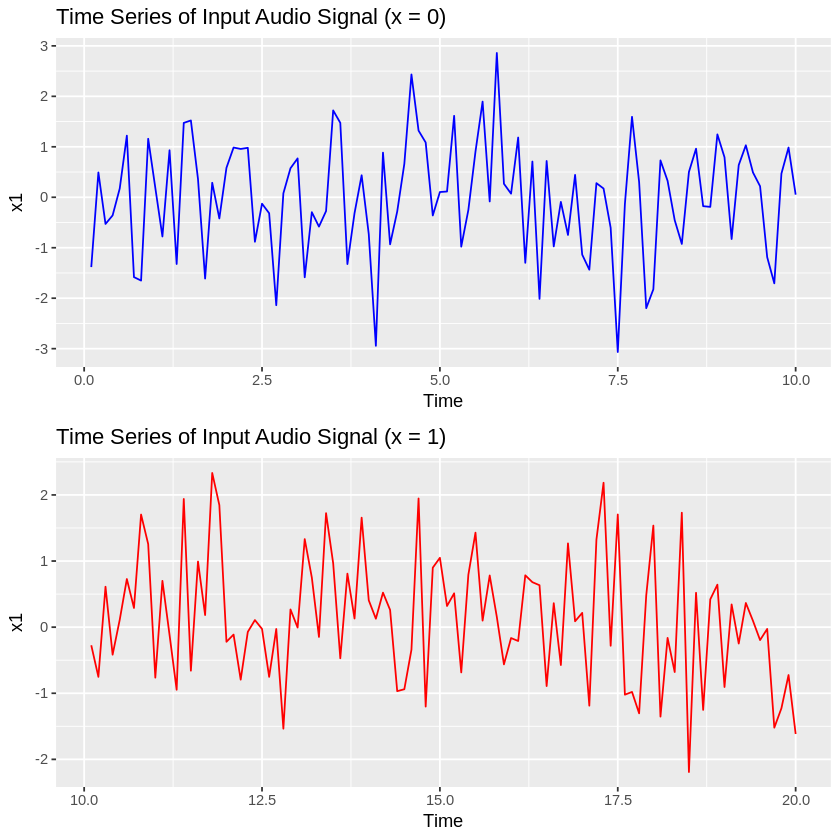

In [159]:
# Time series plot for x = 0
p0 <- ggplot(data_x0, aes(x = time, y = x1)) +
  geom_line(color = "blue") +
  labs(title = "Time Series of Input Audio Signal (x = 0)", x = "Time", y = "x1")

# Time series plot for x = 1
p1 <- ggplot(data_x1, aes(x = time, y = x1)) +
  geom_line(color = "red") +
  labs(title = "Time Series of Input Audio Signal (x = 1)", x = "Time", y = "x1")

# Display plots
library(gridExtra)
grid.arrange(p0, p1, ncol = 1)


Output

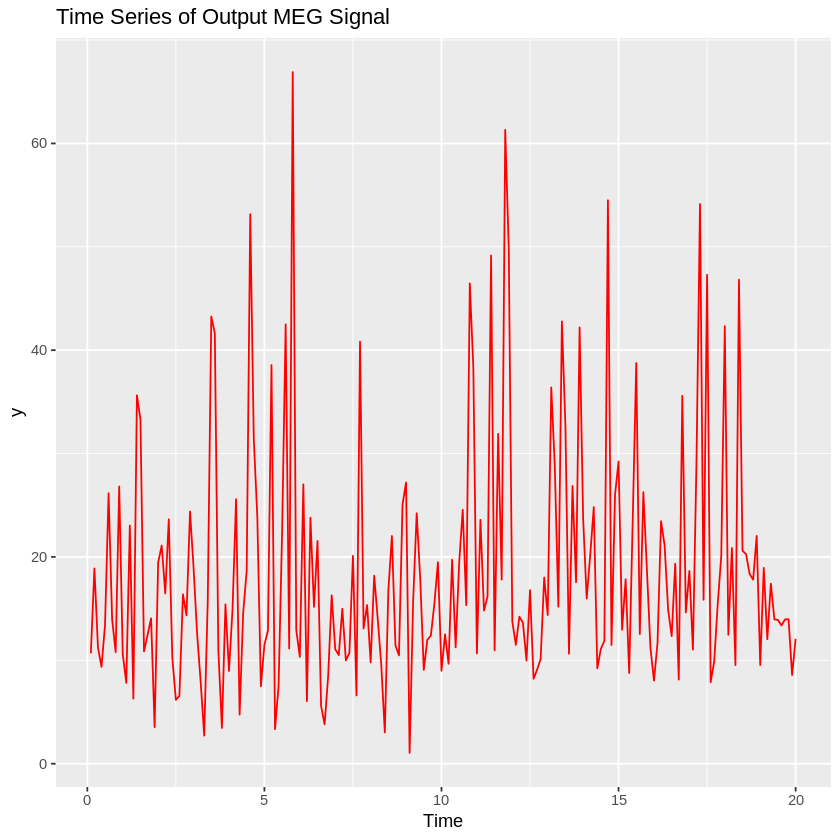

In [160]:
# Time series plot of output MEG signal (y)
ggplot(data, aes(x = time, y = y)) +
  geom_line(color = "red") +
  labs(title = "Time Series of Output MEG Signal", x = "Time", y = "y")

**Task 1.2: Distributions for Input and Output Signals**

Input

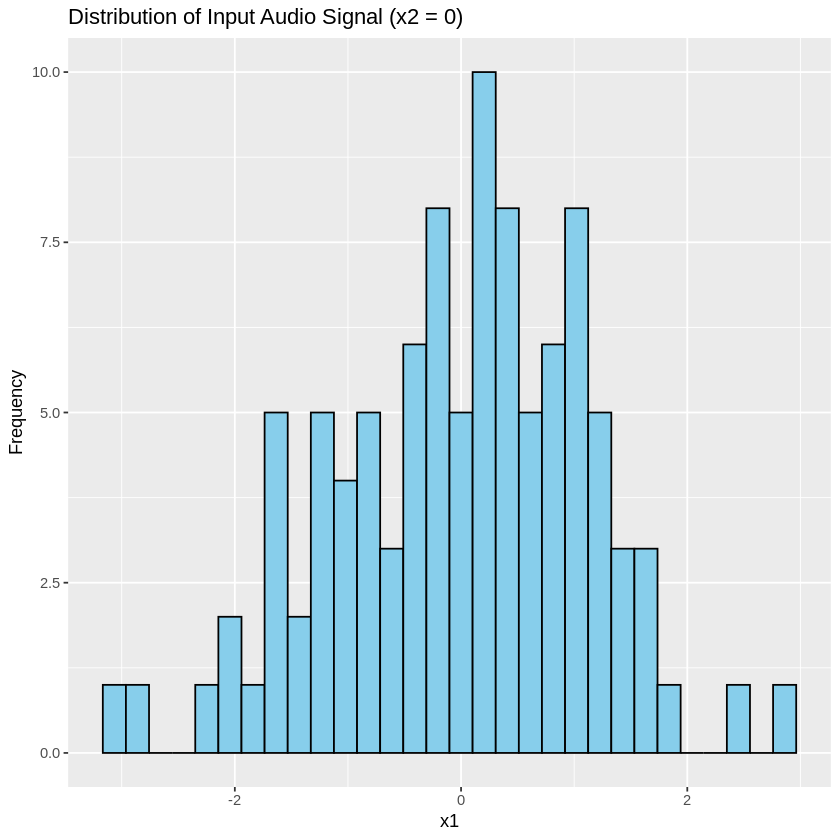

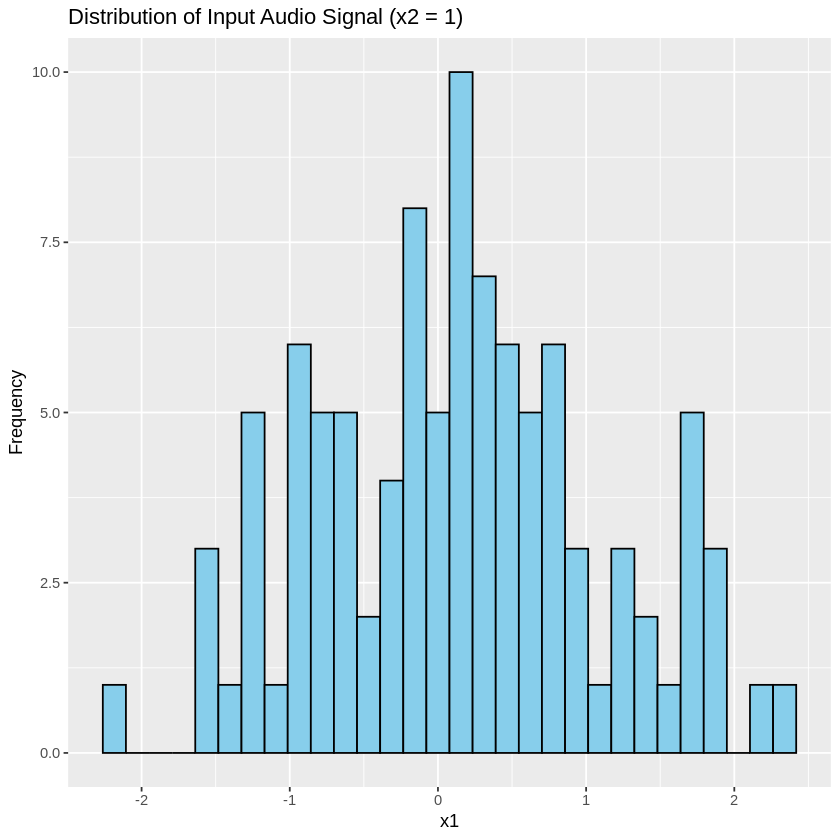

In [161]:
# Distribution of input audio signal (x1 when x2=0)
ggplot(data_x0, aes(x = x1)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Input Audio Signal (x2 = 0)", x = "x1", y = "Frequency")

# Distribution of input audio signal (x1 when x2=1)
ggplot(data_x1, aes(x = x1)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Input Audio Signal (x2 = 1)", x = "x1", y = "Frequency")

Output

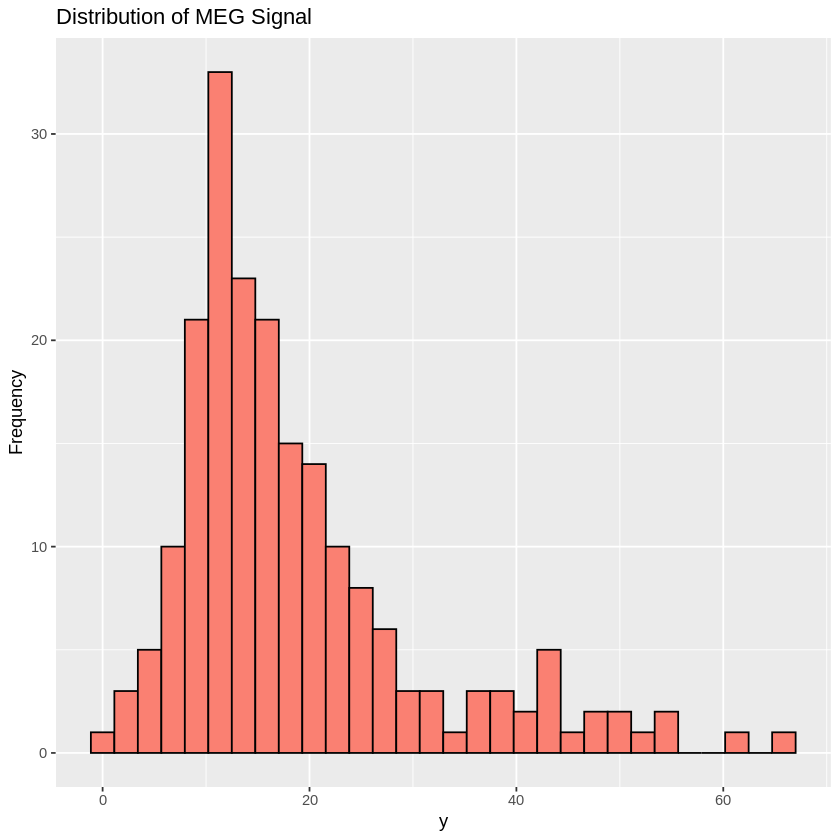

In [162]:
# Distribution of output MEG signal (y)
ggplot(data, aes(x = y)) +
  geom_histogram(bins = 30, fill = "salmon", color = "black") +
  labs(title = "Distribution of MEG Signal", x = "y", y = "Frequency")

**Task 1.3: Correlation and Scatter Plot Between Audio Input and Brain Signal**

[1] "Correlation between x1 and y: 0.765"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


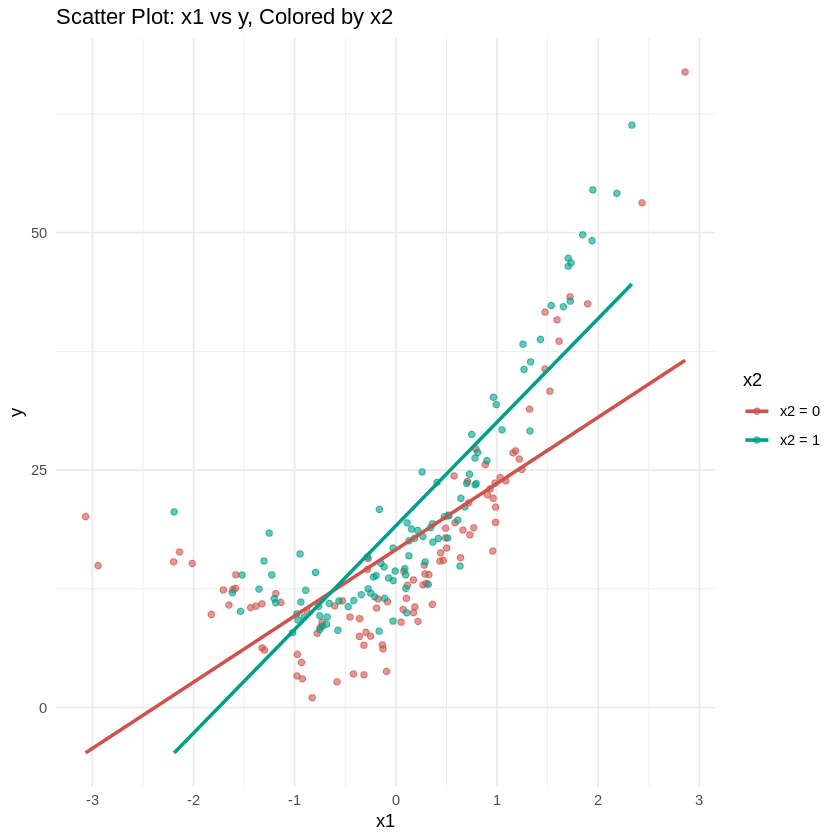

`geom_smooth()` using formula = 'y ~ x'


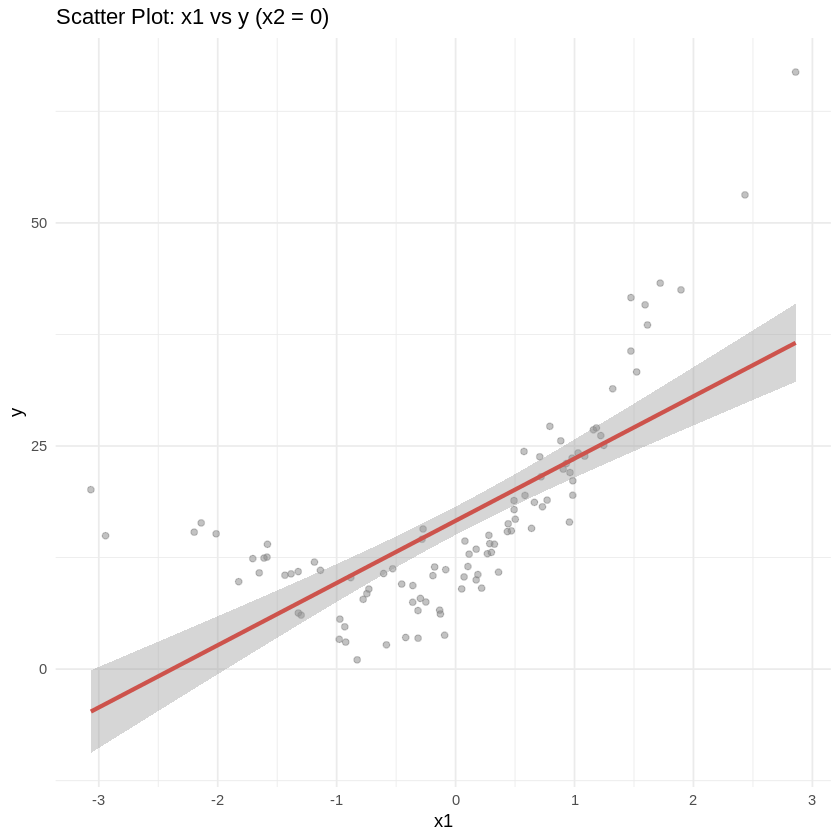

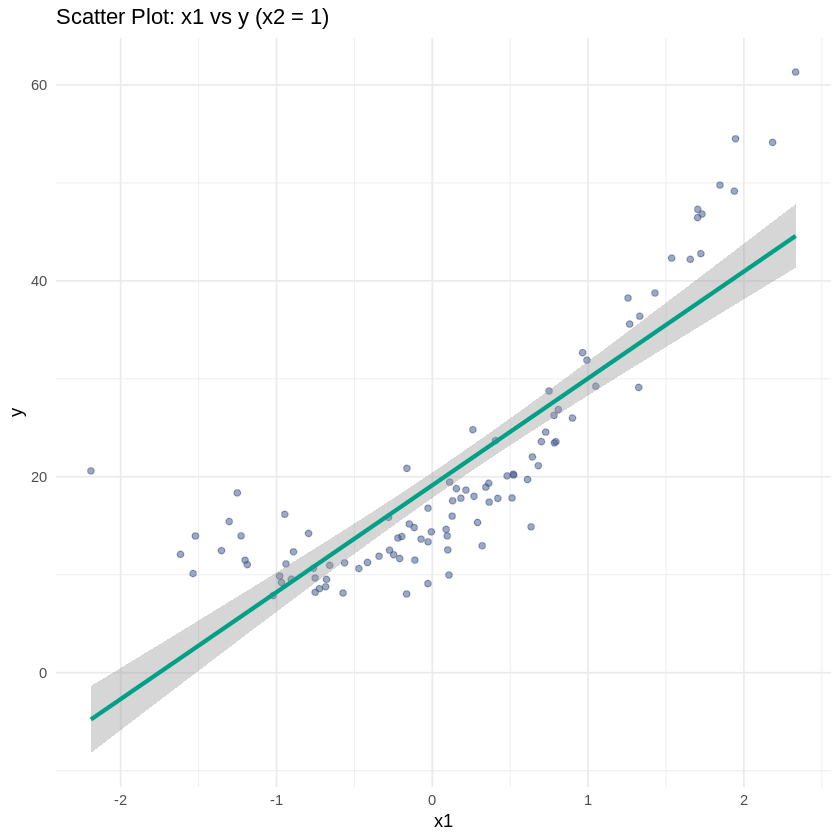

In [163]:
library(ggplot2)

# 1. Correlation between x1 and y
cor_xy <- cor(data$x1, data$y)
print(paste("Correlation between x1 and y:", round(cor_xy, 3)))

# 2. Scatter plot: x1 vs y, colored by x2
ggplot(data, aes(x = x1, y = y, color = as.factor(x2))) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  scale_color_manual(values = c("0" = "#CD534CFF", "1" = "#00A087FF"),
                     name = "x2",
                     labels = c("x2 = 0", "x2 = 1")) +
  labs(title = "Scatter Plot: x1 vs y, Colored by x2",
       x = "x1",
       y = "y") +
  theme_minimal()

# 3. Scatter plot when x2 = 0
ggplot(data_x0, aes(x = x1, y = y)) +
  geom_point(alpha = 0.5, color = "#868686FF") +  # Gray points
  geom_smooth(method = "lm", color = "#CD534CFF", size = 1.2) +  # Red trend line
  labs(title = "Scatter Plot: x1 vs y (x2 = 0)", x = "x1", y = "y") +
  theme_minimal()

# 4. Scatter plot when x2 = 1
ggplot(data_x1, aes(x = x1, y = y)) +
  geom_point(alpha = 0.5, color = "#3C5488FF") +  # Dark blue points
  geom_smooth(method = "lm", color = "#00A087FF", size = 1.2) +  # Teal trend line
  labs(title = "Scatter Plot: x1 vs y (x2 = 1)", x = "x1", y = "y") +
  theme_minimal()


**Task 1.4: Boxplots of Output Brain Signal by Sound Category (x2)**

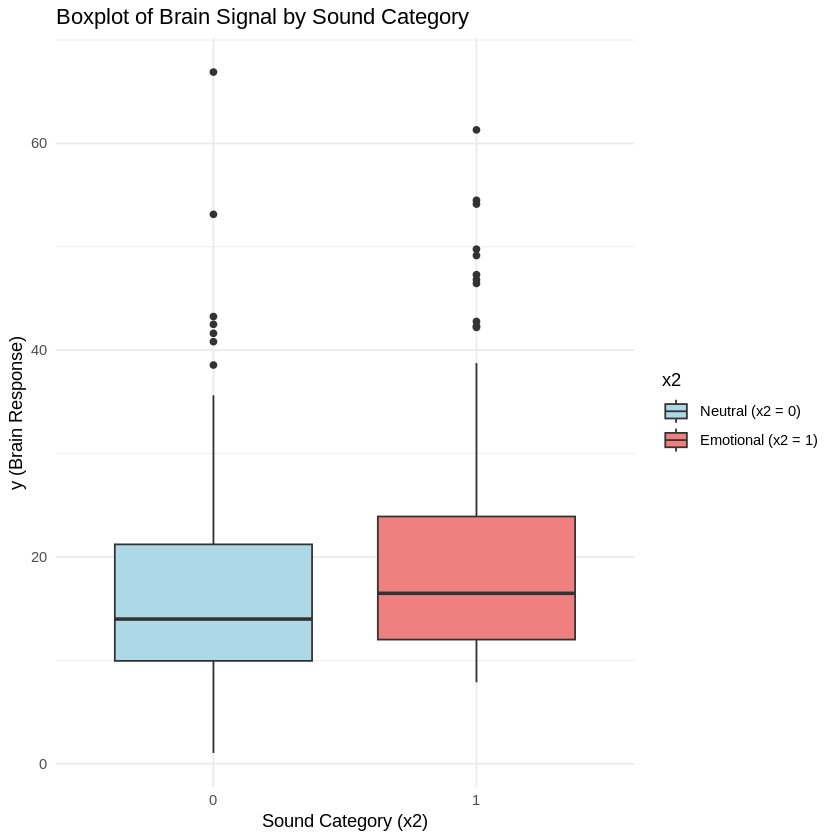

In [164]:
# Ensure x2 is treated as a factor
data$x2 <- as.factor(data$x2)

# Boxplot of y grouped by x2
ggplot(data, aes(x = x2, y = y, fill = x2)) +
  geom_boxplot() +
  scale_fill_manual(values = c("lightblue", "lightcoral"), labels = c("Neutral (x2 = 0)", "Emotional (x2 = 1)")) +
  labs(title = "Boxplot of Brain Signal by Sound Category", x = "Sound Category (x2)", y = "y (Brain Response)") +
  theme_minimal()

# **Task 2: Regression – modelling the brain response (MEG) to a sound signal**

**Task 2.1: Estimate parameters θ using Least Squares for each model**

In [165]:
# Load libraries
library(tidyverse)

# Assuming your dataset is named `data` with columns: x1, x2, y
X_list <- list()

# Define design matrices for each model
X_list[[1]] <- cbind(x1_3 = data$x1^3, x1_5 = data$x1^5, x2 = data$x2, bias = 1)
X_list[[2]] <- cbind(x1 = data$x1, x2 = data$x2, bias = 1)
X_list[[3]] <- cbind(x1 = data$x1, x1_2 = data$x1^2, x1_4 = data$x1^4, x2 = data$x2, bias = 1)
X_list[[4]] <- cbind(x1 = data$x1, x1_2 = data$x1^2, x1_3 = data$x1^3, x1_5 = data$x1^5, x2 = data$x2, bias = 1)
X_list[[5]] <- cbind(x1 = data$x1, x1_3 = data$x1^3, x1_4 = data$x1^4, x2 = data$x2, bias = 1)

theta_hat_list <- list()

# Estimate theta using Normal Equation: θ̂ = (XᵀX)^(-1) Xᵀy
for (i in 1:5) {
  X <- X_list[[i]]
  y <- data$y
  theta_hat_list[[i]] <- solve(t(X) %*% X) %*% t(X) %*% y
}


**Task 2.2: Compute RSS = Σ (y_i - x_i θ̂)^2 for each model**

In [166]:
rss_list <- list()

for (i in 1:5) {
  X <- X_list[[i]]
  y <- data$y
  theta_hat <- theta_hat_list[[i]]
  y_pred <- X %*% theta_hat
  residuals <- y - y_pred
  rss_list[[i]] <- sum(residuals^2)
}

print(rss_list)

[[1]]
[1] 11825.42

[[2]]
[1] 11238.95

[[3]]
[1] 1636.168

[[4]]
[1] 1902.063

[[5]]
[1] 4928.312



**Task 2.3: Compute Log-Likelihood**

In [167]:
log_likelihood_list <- list()
n <- nrow(data)

for (i in 1:5) {
  RSS <- rss_list[[i]]
  sigma_hat2 <- RSS / n
  log_likelihood <- -n/2 * log(2 * pi) - n/2 * log(sigma_hat2) - RSS / (2 * sigma_hat2)
  log_likelihood_list[[i]] <- log_likelihood
}
print(log_likelihood_list)

[[1]]
[1] -691.7567

[[2]]
[1] -686.67

[[3]]
[1] -493.9672

[[4]]
[1] -509.0254

[[5]]
[1] -604.2312



**Task 2.4: Compute AIC and BIC**

In [168]:
aic_list <- bic_list <- list()

for (i in 1:5) {
  k <- ncol(X_list[[i]])  # number of parameters
  ll <- log_likelihood_list[[i]]
  aic_list[[i]] <- 2 * k - 2 * ll
  bic_list[[i]] <- k * log(n) - 2 * ll
}

**Task 2.5: Residual distribution plots and Q-Q plots**

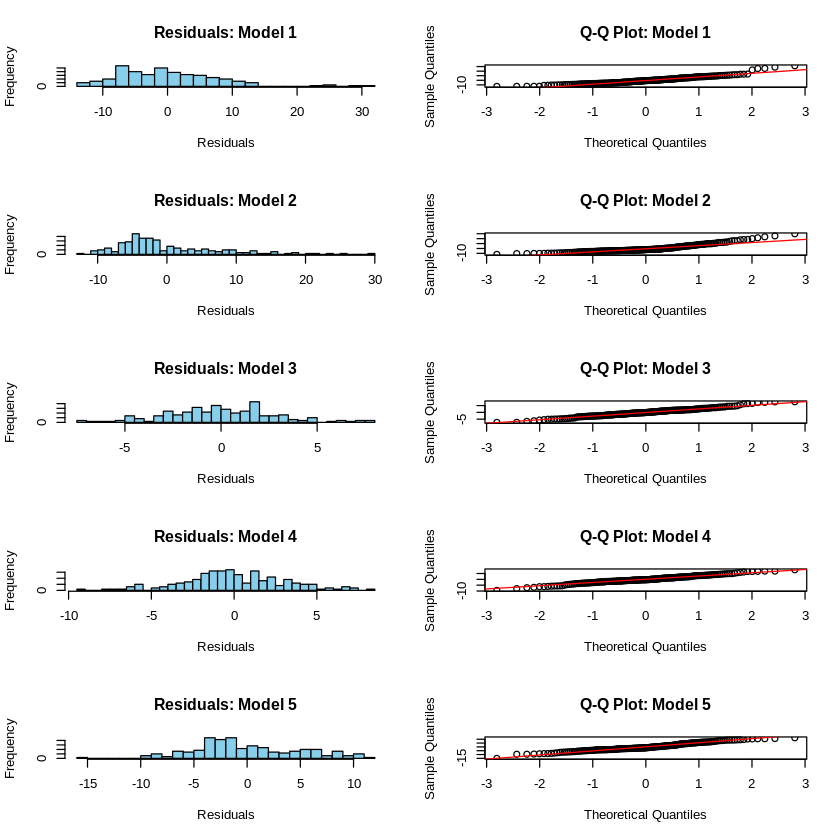

In [169]:
par(mfrow = c(5, 2))  # Layout for 5 models

for (i in 1:5) {
  X <- X_list[[i]]
  theta_hat <- theta_hat_list[[i]]
  y_pred <- X %*% theta_hat
  residuals <- data$y - y_pred

  # Histogram
  hist(residuals, main = paste("Residuals: Model", i), xlab = "Residuals", col = "skyblue", breaks = 30)

  # Q-Q Plot
  qqnorm(residuals, main = paste("Q-Q Plot: Model", i))
  qqline(residuals, col = "red")
}

**Task 2.6: Select the Best Model**

In [170]:
# Assuming you already have these two lists:
# aic_list and bic_list

# Combine AIC and BIC into a data frame
model_comparison <- data.frame(
  Model = paste("Model", 1:5),
  AIC = sapply(aic_list, as.numeric),
  BIC = sapply(bic_list, as.numeric)
)

# Find model with minimum AIC and BIC
model_comparison$Best_AIC <- model_comparison$AIC == min(model_comparison$AIC)
model_comparison$Best_BIC <- model_comparison$BIC == min(model_comparison$BIC)

# Display the result
print(model_comparison)

    Model       AIC      BIC Best_AIC Best_BIC
1 Model 1 1391.5133 1404.707    FALSE    FALSE
2 Model 2 1379.3401 1389.235    FALSE    FALSE
3 Model 3  997.9343 1014.426     TRUE     TRUE
4 Model 4 1030.0508 1049.841    FALSE    FALSE
5 Model 5 1218.4623 1234.954    FALSE    FALSE


**Task 2.7: Train/Test split and confidence intervals**

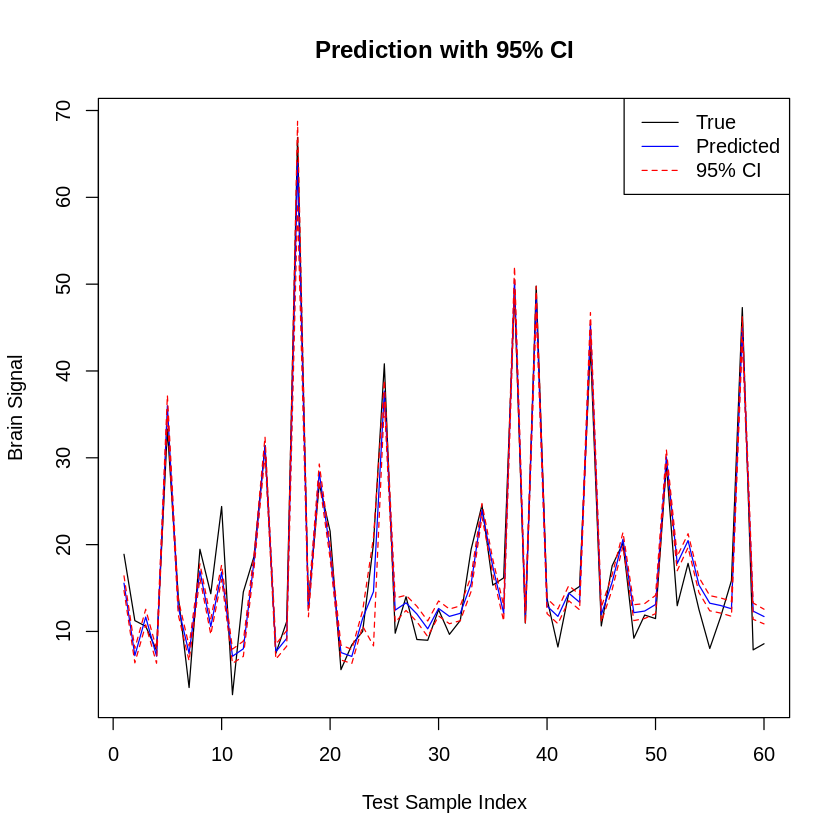

In [171]:
set.seed(123)
train_indices <- sample(1:n, size = 0.7 * n)
test_indices <- setdiff(1:n, train_indices)

# Replace X_best with your selected model's design matrix
X_best <- X_list[[3]]
theta_best <- theta_hat_list[[3]]

X_train <- X_best[train_indices, ]
y_train <- data$y[train_indices]
X_test <- X_best[test_indices, ]
y_test <- data$y[test_indices]

# Re-estimate θ using training data
theta_hat_train <- solve(t(X_train) %*% X_train) %*% t(X_train) %*% y_train

# Predict on test data
y_pred_test <- X_test %*% theta_hat_train

# Compute residuals and standard error
residuals_train <- y_train - X_train %*% theta_hat_train
sigma_hat2_train <- sum(residuals_train^2) / (nrow(X_train) - ncol(X_train))

# 95% CI: y_pred ± 1.96 * SE
XTX_inv <- solve(t(X_train) %*% X_train)
se_pred <- sqrt(diag(X_test %*% XTX_inv %*% t(X_test)) * sigma_hat2_train)

lower <- y_pred_test - 1.96 * se_pred
upper <- y_pred_test + 1.96 * se_pred

# Plot predictions with confidence intervals
plot(y_test, type = "l", col = "black", ylim = range(c(lower, upper, y_test)),
     ylab = "Brain Signal", xlab = "Test Sample Index", main = "Prediction with 95% CI")
lines(y_pred_test, col = "blue")
lines(lower, col = "red", lty = 2)
lines(upper, col = "red", lty = 2)
legend("topright", legend = c("True", "Predicted", "95% CI"),
       col = c("black", "blue", "red"), lty = c(1,1,2))

# **Task 3: Approximate Bayesian Computation (ABC)**

**Preparation**

In [172]:
set.seed(123)  # for reproducibility

**Identify the 2 parameters with largest absolute values in theta_hat**

In [173]:
top_2_indices <- order(abs(theta_hat), decreasing = TRUE)[1:2]
theta1_idx <- top_2_indices[1]
theta2_idx <- top_2_indices[2]

**Define prior distributions for the two parameters**

In [174]:
# Define Uniform prior range around LS estimates ±50%
theta1_range <- c(0.5, 1.5) * theta_hat[theta1_idx]
theta2_range <- c(0.5, 1.5) * theta_hat[theta2_idx]

**Generate samples from the priors**

In [175]:
n_samples <- 10000  # total samples

# Draw samples from Uniform prior for each parameter
theta1_samples <- runif(n_samples, min = theta1_range[1], max = theta1_range[2])
theta2_samples <- runif(n_samples, min = theta2_range[1], max = theta2_range[2])

**Fix all other parameters from Task 2.1 except the top two abd then simulate prediction**

In [176]:
# y_true is your true output
rss_all <- numeric(n_samples)  # to store RSS for each sample

for (i in 1:n_samples) {
  theta_sample <- theta_hat  # Start with full LS-estimate vector

  # Replace only the two selected parameters with new sampled values
  theta_sample[theta1_idx] <- theta1_samples[i]
  theta_sample[theta2_idx] <- theta2_samples[i]

  # Simulate prediction and compute error
  y_pred <- X_best %*% theta_sample
  # Compute residual sum of squares
  rss_all[i] <- sum((y_true - y_pred)^2)
}

**Perform Rejection ABC**

In [177]:
# Define quantile-based threshold (top 1% samples with lowest RSS)
threshold <- quantile(rss_all, 0.01)

# Get indices of accepted samples
accepted_indices <- which(rss_all <= threshold)

# Store accepted parameter samples
accepted_samples <- data.frame(
  theta1 = theta1_samples[accepted_indices],
  theta2 = theta2_samples[accepted_indices]
)

# Display how many samples were accepted
cat("Accepted samples:", nrow(accepted_samples), "/", n_samples, "\n")

Accepted samples: 100 / 10000 


**Plot the posterior distributions**

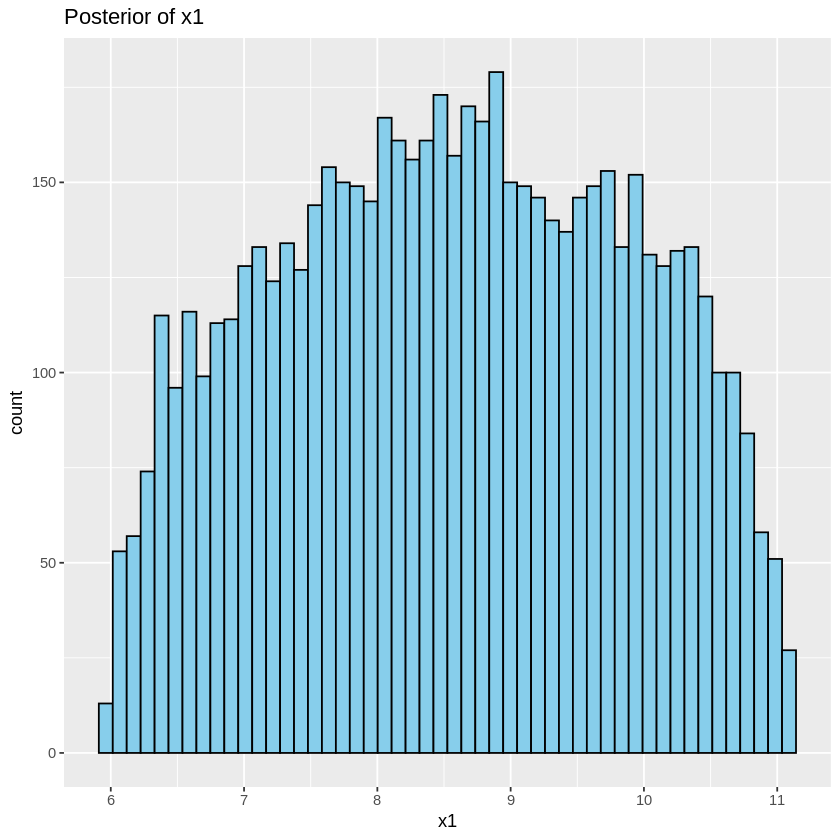

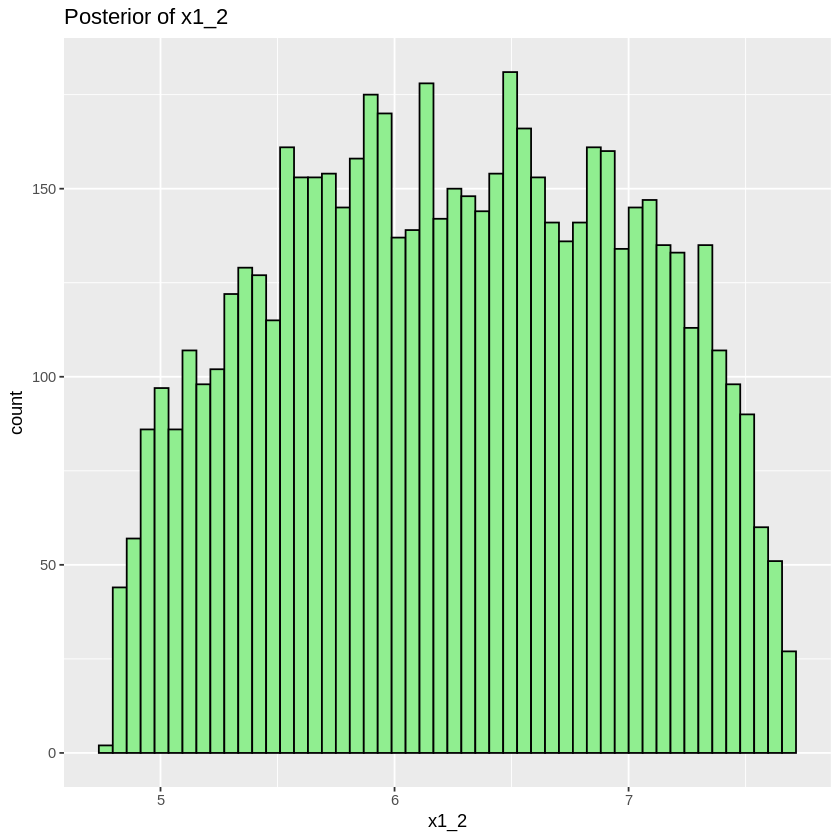

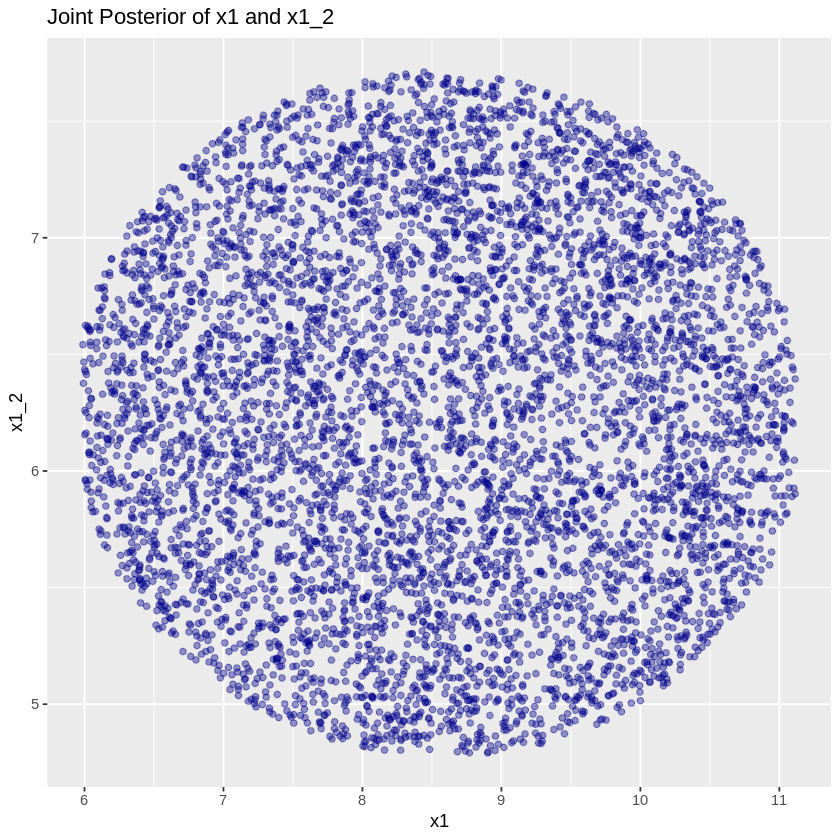

In [178]:
# Marginal distributions
ggplot(accepted, aes(x = theta1)) +
  geom_histogram(bins = 50, fill = "skyblue", color = "black") +
  ggtitle(paste("Posterior of", theta_names[1])) +
  xlab(theta_names[1])

ggplot(accepted, aes(x = theta2)) +
  geom_histogram(bins = 50, fill = "lightgreen", color = "black") +
  ggtitle(paste("Posterior of", theta_names[2])) +
  xlab(theta_names[2])

# Joint distribution
ggplot(accepted, aes(x = theta1, y = theta2)) +
  geom_point(alpha = 0.4, color = "darkblue") +
  ggtitle(paste("Joint Posterior of", theta_names[1], "and", theta_names[2])) +
  xlab(theta_names[1]) +
  ylab(theta_names[2])
